In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns
from operator import itemgetter
import math
vdfx = pd.read_csv("../asic/asic_catapult_tempmatch_area.csv", index_col=0)
cdfx = pd.read_csv("../asic/asic_catapult_tempmatch_latency.csv", index_col=0)
li=[]
viv_violin=pd.read_csv("../asic/asic_catapult_tempmatch_area_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin=pd.read_csv("../asic/asic_catapult_tempmatch_latency_violin.csv",index_col=None)
li.append(cat_violin)
violin=pd.concat(li, axis=0, ignore_index=True)
l2=[]
l2.append(violin)
cdfx['1/obj1'] = 1/cdfx['obj1']
vdfx['1/obj1'] = 1/vdfx['obj1']
cdfx['1/obj2'] = 1/cdfx['obj2']
vdfx['1/obj2'] = 1/vdfx['obj2']

cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_tmpsize'])
cdfx = cdfx.drop(columns=['knob_size'])
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['knob_tmpsize'])
vdfx = vdfx.drop(columns=['knob_size'])

         

Text(0.5, 1.0, 'Catapult tempmatch Design Space')

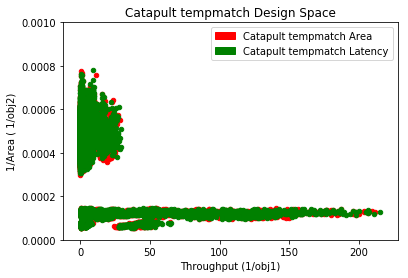

In [2]:
ax1 = vdfx.plot(x='1/obj1', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='1/obj1', y='1/obj2', kind='scatter', c='g',ax=ax1)
ax1.set_ylim(0,0.001)

red_data = mpatches.Patch(color='red', label='Catapult tempmatch Area')
green_data = mpatches.Patch(color='green', label='Catapult tempmatch Latency')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (1/obj1)')
plt.ylabel('1/Area ( 1/obj2)')
plt.title("Catapult tempmatch Design Space")

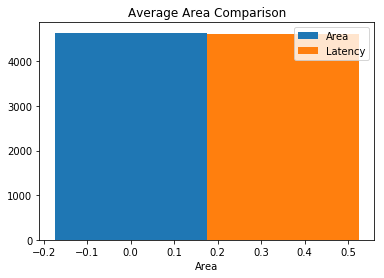

In [3]:
fig, ax = plt.subplots()

N=1
area_val=(vdfx['obj2'].mean())
latency_val=(cdfx['obj2'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,area_val,width,label='Area')
p2=ax.bar(ind+width,latency_val,width,label='Latency')

ax.set_title('Average Area Comparison')
ax.set_xlabel('Area')

ax.legend((p1[0], p2[0]), ('Area', 'Latency'))

ax.autoscale_view()
plt.show()

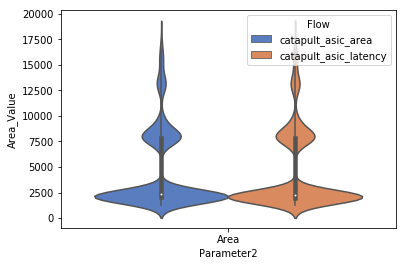

In [4]:
ax = sns.violinplot(x="Parameter2", y="Area_Value", hue="Flow",
                    data=violin, palette="muted",
                    scale="count")

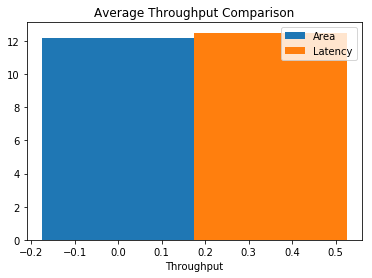

In [5]:
fig, ax = plt.subplots()

N=1
area_val=(vdfx['1/obj1'].mean())
latency_val=(cdfx['1/obj1'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,area_val,width,label='Area')
p2=ax.bar(ind+width,latency_val,width,label='Latency')

ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')

ax.legend((p1[0], p2[0]), ('Area', 'Latency'))

ax.autoscale_view()
plt.show()

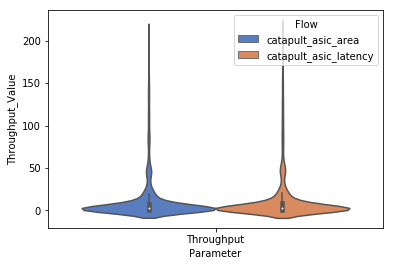

In [6]:
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Flow",palette="muted",scale="count")

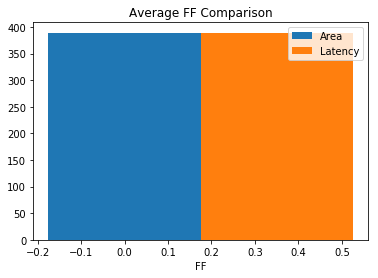

In [7]:
fig, ax = plt.subplots()

N=1
area_val=(vdfx['FF'].mean())
latency_val=(cdfx['FF'].mean())

ind = np.arange(N)
width = 0.35 

p1=ax.bar(ind,area_val,width,label='Area')
p2=ax.bar(ind+width,latency_val,width,label='Latency')

ax.set_title('Average FF Comparison')
ax.set_xlabel('FF')

ax.legend((p1[0], p2[0]), ('Area', 'Latency'))

ax.autoscale_view()
plt.show()


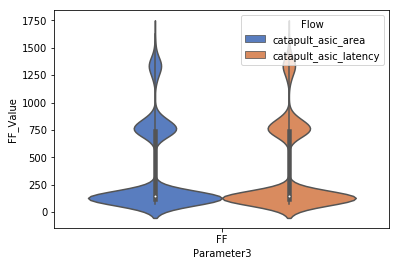

In [8]:
ax=sns.violinplot(x="Parameter3",y="FF_Value",data=violin,hue="Flow",palette="muted",scale="count")

In [9]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, 
                 on=
                 [
                    'knob_tmpdim',
                    'knob_indim',        
                    'knob_UNROLL_FACTOR',
                    'knob_UNROLL_LOOP1', 
                    'knob_UNROLL_LOOP2', 
                    'knob_UNROLL_LOOP3', 
                    'knob_UNROLL_LOOP4' 
                 ], how='inner')

(0, 0.001)

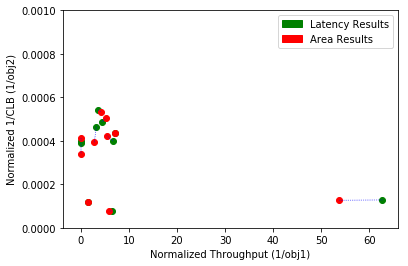

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample['1/obj1_x'], c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample['1/obj1_y'], c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['1/obj1_x'], row['1/obj1_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

green_data = mpatches.Patch(color='green', label='Latency Results')
red_data = mpatches.Patch(color='red', label='Area Results')
plt.legend(handles=[green_data, red_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0,0.001)

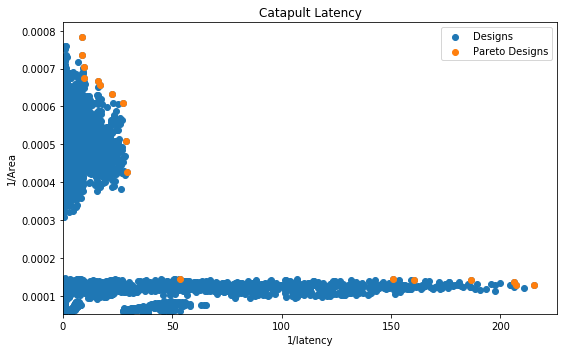

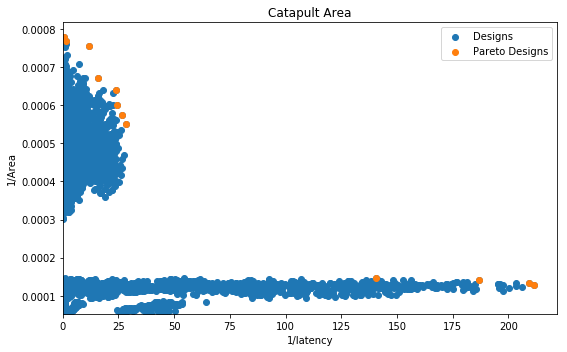

In [11]:

sys.path.append('./pareto_files')
from utils import adrs, read_design_space, approximate_pareto


X2, y2, _, names2, _ = read_design_space('../asic/asic_catapult_tempmatch_latency_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

X3, y3, _, names3, _ = read_design_space('../asic/asic_catapult_tempmatch_area_sherlock.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)




plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
y_pareto2 = approximate_pareto(y2)[0]
y_pareto2_index = approximate_pareto(y2)[1]
plt.scatter(y2[:,0], y2[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Latency")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "Area")
plt.xlim(left=y2[:,0].min()*0.95, right=y2[:,0].max()*1.05)
plt.ylim(bottom=y2[:,1].min()*0.95, top=y2[:,1].max()*1.05)
plt.tight_layout()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,2)
y_pareto3 = approximate_pareto(y3)[0]
y_pareto3_index = approximate_pareto(y3)[1]
plt.scatter(y3[:,0], y3[:,1],label='Designs')
plt.legend()
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],label='Pareto Designs')
plt.legend()
plt.title("Catapult Area")
plt.xlabel("1/" + "latency")
plt.ylabel("1/" + "Area")
plt.xlim(left=y3[:,0].min()*0.95, right=y3[:,0].max()*1.05)
plt.ylim(bottom=y3[:,1].min()*0.95, top=y3[:,1].max()*1.05)
plt.tight_layout()


(0, 0.001)

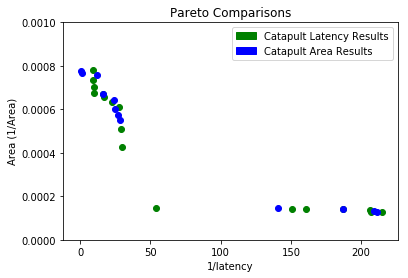

In [12]:
plt.scatter(y_pareto2[:,0], y_pareto2[:,1],c='g')
plt.scatter(y_pareto3[:,0], y_pareto3[:,1],c='b')



green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
blue_data=mpatches.Patch(color='blue',label='Catapult Area Results')
plt.legend(handles=[green_data,blue_data])
plt.xlabel('1/latency')
plt.ylabel('Area (1/Area)')
plt.title("Pareto Comparisons")
plt.ylim(0,0.001)


In [13]:
c_latdfx = pd.read_csv("../asic/asic_catapult_tempmatch_latency_sherlock.csv", index_col=0)
c_areadfx = pd.read_csv("../asic/asic_catapult_tempmatch_area_sherlock.csv", index_col=0)

In [14]:


y_pareto2_sorted=[]
y_pareto3_sorted=[]
for i in range(len(y_pareto2_index)):
    y_pareto2_sorted.append((i,y_pareto2[i][0],y_pareto2[i][1]))
y_pareto2_sorted=sorted(y_pareto2_sorted, key=itemgetter(2))

for i in range(len(y_pareto3_index)):
    y_pareto3_sorted.append((i,y_pareto3[i][0],y_pareto3[i][1]))
y_pareto3_sorted=sorted(y_pareto3_sorted, key=itemgetter(2))



In [15]:
def euclid(a,b,c,d):
    t=math.sqrt(((a-b)**2)+((c-d)**2))
    return t

In [16]:
c_lat_esp=0.001
c_area_esp=0.001

In [17]:
c_latdfx_copy=c_latdfx.copy()
for i in y_pareto2_index:
    c_latdfx_copy=c_latdfx_copy.drop(index=i)
c_lat_pts=[]
for i in range(len(y_pareto2_index)):
    for index,row in c_latdfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto2[i][0],1/row['obj2'],y_pareto2[i][1])<c_lat_esp:
            if index in c_lat_pts:
                pass
            else:
                c_lat_pts.append(index)
                
                
c_areadfx_copy=c_areadfx.copy()
for i in y_pareto3_index:
    c_areadfx_copy=c_areadfx_copy.drop(index=i)
c_area_pts=[]
for i in range(len(y_pareto3_index)):
    for index,row in c_areadfx_copy.iterrows():
        if euclid(1/row['obj1'],y_pareto3[i][0],1/row['obj2'],y_pareto3[i][1])<c_area_esp:
            if index in c_area_pts:
                pass
            else:
                c_area_pts.append(index)

In [18]:
li=[]
for i in y_pareto2_index:
    t2=c_areadfx.loc[(c_areadfx["knob_tmpdim"]==c_latdfx.loc[i]["knob_tmpdim"]) & (c_areadfx["knob_indim"]==c_latdfx.loc[i]["knob_indim"])& (c_areadfx["knob_UNROLL_FACTOR"]==c_latdfx.loc[i]["knob_UNROLL_FACTOR"])& (c_areadfx["knob_UNROLL_LOOP1"]==c_latdfx.loc[i]["knob_UNROLL_LOOP1"])&(c_areadfx["knob_UNROLL_LOOP2"]==c_latdfx.loc[i]["knob_UNROLL_LOOP2"])&(c_areadfx["knob_UNROLL_LOOP3"]==c_latdfx.loc[i]["knob_UNROLL_LOOP3"])&(c_areadfx["knob_UNROLL_LOOP4"]==c_latdfx.loc[i]["knob_UNROLL_LOOP4"])]
    li.append((i,t2))
    
li2=[]
for i in c_lat_pts:
    t2=c_areadfx.loc[(c_areadfx["knob_tmpdim"]==c_latdfx_copy.loc[i]["knob_tmpdim"]) & (c_areadfx["knob_indim"]==c_latdfx_copy.loc[i]["knob_indim"])& (c_areadfx["knob_UNROLL_FACTOR"]==c_latdfx_copy.loc[i]["knob_UNROLL_FACTOR"])& (c_areadfx["knob_UNROLL_LOOP1"]==c_latdfx_copy.loc[i]["knob_UNROLL_LOOP1"])&(c_areadfx["knob_UNROLL_LOOP2"]==c_latdfx_copy.loc[i]["knob_UNROLL_LOOP2"])&(c_areadfx["knob_UNROLL_LOOP3"]==c_latdfx_copy.loc[i]["knob_UNROLL_LOOP3"])&(c_areadfx["knob_UNROLL_LOOP4"]==c_latdfx_copy.loc[i]["knob_UNROLL_LOOP4"])]
    li2.append((i,t2))

(0.0001, 0.001)

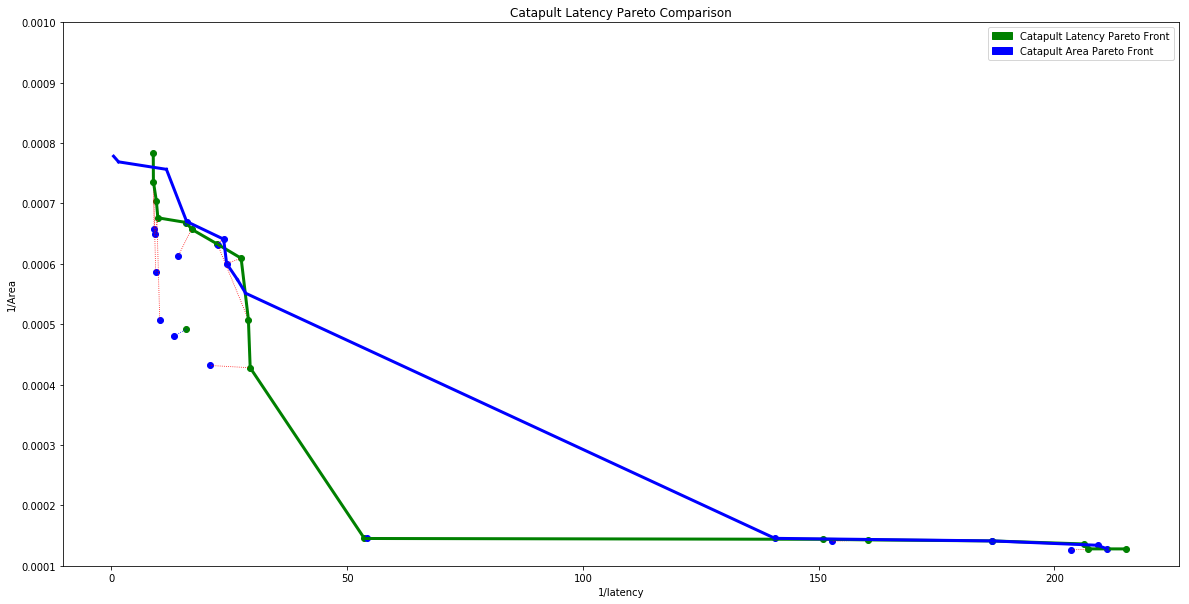

In [19]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    
    if li[i][1].empty==False:
        b=li[i][1].get_values()
        plt.scatter(x=y_pareto2[i][0], y=y_pareto2[i][1], c='g')
        plt.scatter(x=1/(b[0][10]), y=1/(b[0][11]), c='b') 

for i in range(len(li)):

    if li[i][1].empty==False:
        b=li[i][1].get_values()
        plt.plot([y_pareto2[i][0], 1/(b[0][10])],[y_pareto2[i][1], 1/b[0][11]],'r:',linewidth=0.8)

for i in range(len(li2)):
    if li2[i][1].empty==False:
        b=li2[i][1].get_values()
        plt.scatter(x=1/c_latdfx_copy.loc[li2[i][0]]['obj1'], y=1/c_latdfx_copy.loc[li2[i][0]]['obj2'], c='g')        

        plt.scatter(x=1/(b[0][10]), y=1/(b[0][11]), c='b') 

for i in range(len(li2)):
    if li2[i][1].empty==False: 
        b=li2[i][1].get_values()
        plt.plot([1/c_latdfx_copy.loc[li2[i][0]]['obj1'], 1/(b[0][10])],[1/c_latdfx_copy.loc[li2[i][0]]['obj2'], 1/b[0][11]],'b:',linewidth=0.8)

for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[green_data,blue_data])
plt.title('Catapult Latency Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('1/Area')
plt.ylim(0.0001,0.001)

In [20]:
li=[]
for i in y_pareto3_index:
    t2=c_latdfx.loc[(c_latdfx["knob_tmpdim"]==c_areadfx.loc[i]["knob_tmpdim"]) & (c_latdfx["knob_indim"]==c_areadfx.loc[i]["knob_indim"])& (c_latdfx["knob_UNROLL_FACTOR"]==c_areadfx.loc[i]["knob_UNROLL_FACTOR"])& (c_latdfx["knob_UNROLL_LOOP1"]==c_areadfx.loc[i]["knob_UNROLL_LOOP1"])&(c_latdfx["knob_UNROLL_LOOP2"]==c_areadfx.loc[i]["knob_UNROLL_LOOP2"])&(c_latdfx["knob_UNROLL_LOOP3"]==c_areadfx.loc[i]["knob_UNROLL_LOOP3"])&(c_latdfx["knob_UNROLL_LOOP4"]==c_areadfx.loc[i]["knob_UNROLL_LOOP4"])]
    li.append((i,t2))
    
li2=[]
for i in c_area_pts:
    t2=c_latdfx.loc[(c_latdfx["knob_tmpdim"]==c_areadfx_copy.loc[i]["knob_tmpdim"]) & (c_latdfx["knob_indim"]==c_areadfx_copy.loc[i]["knob_indim"])& (c_latdfx["knob_UNROLL_FACTOR"]==c_areadfx_copy.loc[i]["knob_UNROLL_FACTOR"])& (c_latdfx["knob_UNROLL_LOOP1"]==c_areadfx_copy.loc[i]["knob_UNROLL_LOOP1"])&(c_latdfx["knob_UNROLL_LOOP2"]==c_areadfx_copy.loc[i]["knob_UNROLL_LOOP2"])&(c_latdfx["knob_UNROLL_LOOP3"]==c_areadfx_copy.loc[i]["knob_UNROLL_LOOP3"])&(c_latdfx["knob_UNROLL_LOOP4"]==c_areadfx_copy.loc[i]["knob_UNROLL_LOOP4"])]
    li2.append((i,t2))

(0.0001, 0.001)

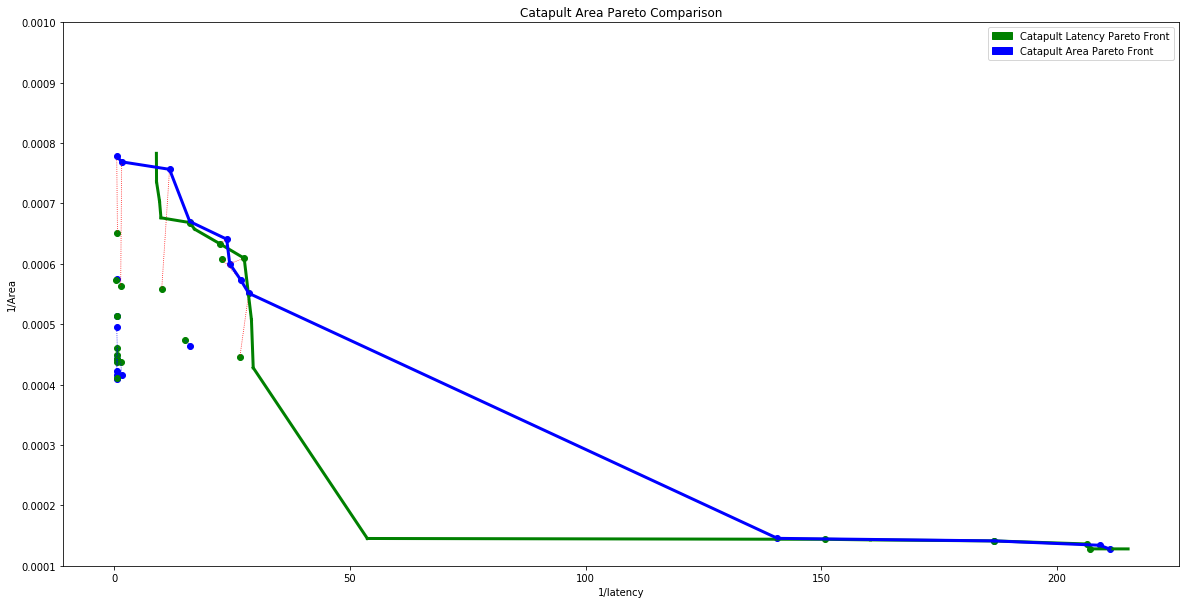

In [21]:
plt.figure(figsize=(20,10))
for i in range(len(li)):
    if li[i][1].empty==False:
        b=li[i][1].get_values()
        plt.scatter(x=y_pareto3[i][0], y=y_pareto3[i][1], c='b')
        plt.scatter(x=1/(b[0][10]), y=1/(b[0][11]), c='g') 

for i in range(len(li)):

    if li[i][1].empty==False:
        b=li[i][1].get_values()
        plt.plot([y_pareto3[i][0], 1/(b[0][10])],[y_pareto3[i][1], 1/b[0][11]],'r:',linewidth=0.8)

for i in range(len(li2)):
    if li2[i][1].empty==False:
        b=li2[i][1].get_values()
        plt.scatter(x=1/c_areadfx_copy.loc[li2[i][0]]['obj1'], y=1/c_areadfx_copy.loc[li2[i][0]]['obj2'], c='b')        

        plt.scatter(x=1/(b[0][10]), y=1/(b[0][11]), c='g') 

for i in range(len(li2)):
    if li2[i][1].empty==False: 
        b=li2[i][1].get_values()
        plt.plot([1/c_areadfx_copy.loc[li2[i][0]]['obj1'], 1/(b[0][10])],[1/c_areadfx_copy.loc[li2[i][0]]['obj2'], 1/b[0][11]],'b:',linewidth=0.8)        
        
for i in range(len(y_pareto2_index)-1):
    plt.plot([y_pareto2_sorted[i][1],y_pareto2_sorted[i+1][1]],[y_pareto2_sorted[i][2],y_pareto2_sorted[i+1][2]],'green',linewidth=3)
for i in range(len(y_pareto3_index)-1):
    plt.plot([y_pareto3_sorted[i][1],y_pareto3_sorted[i+1][1]],[y_pareto3_sorted[i][2],y_pareto3_sorted[i+1][2]],'blue',linewidth=3)
green_data = mpatches.Patch(color='green', label='Catapult Latency Pareto Front')
blue_data = mpatches.Patch(color='blue', label='Catapult Area Pareto Front')
plt.legend(handles=[green_data,blue_data])
plt.title('Catapult Area Pareto Comparison')
plt.xlabel('1/latency')
plt.ylabel('1/Area')
plt.ylim(0.0001,0.001)

In [22]:
li=[]
asic_cat_violin1=pd.read_csv("../asic/asic_catapult_tempmatch_area_violin.csv",index_col=None)
li.append(asic_cat_violin1)
asic_cat_violin2=pd.read_csv("../asic/asic_catapult_tempmatch_latency_violin.csv",index_col=None)
li.append(asic_cat_violin2)
viv_violin=pd.read_csv("../csv/vivado_tempmatch_violin.csv",index_col=None)
li.append(viv_violin)
cat_violin1=pd.read_csv("../csv/catapult_tempmatch_area_violin.csv",index_col=None)
li.append(cat_violin1)
cat_violin2=pd.read_csv("../csv/catapult_tempmatch_latency_violin.csv",index_col=None)
li.append(cat_violin2)
violin=pd.concat(li, axis=0, ignore_index=True,sort='False')
l2=[]
l2.append(violin)

Text(0.5, 1.0, 'Throughput Distribution')

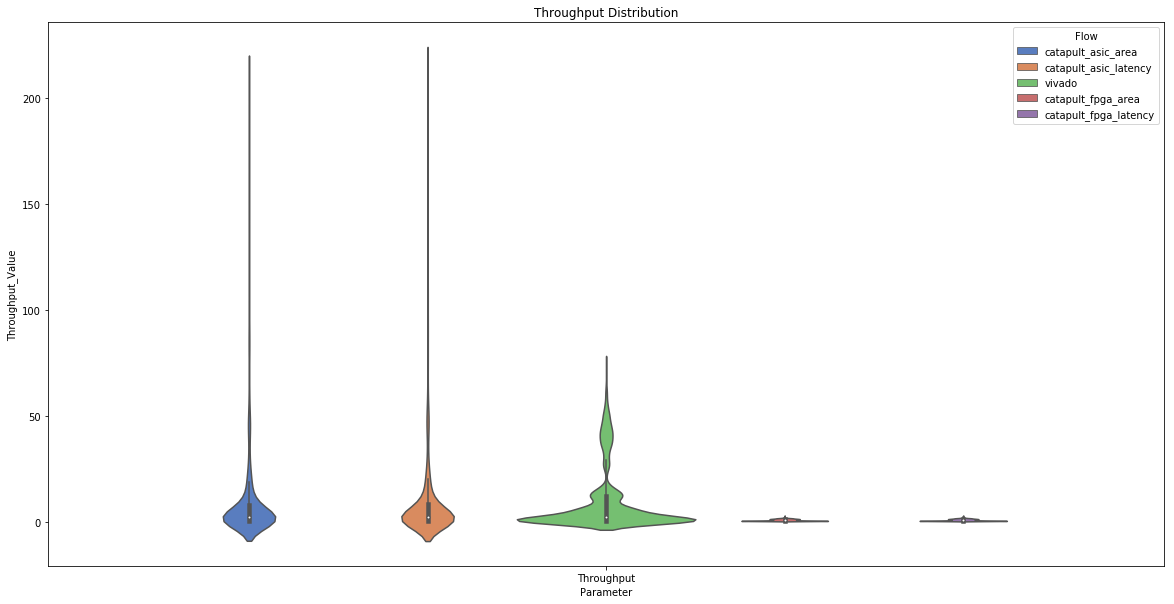

In [23]:
plt.figure(figsize=(20,10))
ax=sns.violinplot(x="Parameter",y="Throughput_Value",data=violin,hue="Flow",palette="muted",scale="count")
plt.title("Throughput Distribution")


In [24]:
caadfx = pd.read_csv("../asic/asic_catapult_tempmatch_area.csv", index_col=0)
caldfx = pd.read_csv("../asic/asic_catapult_tempmatch_latency.csv", index_col=0)
vdfx = pd.read_csv("../csv/vivado_tempmatch.csv", index_col=0)
cfadfx = pd.read_csv("../csv/catapult_tempmatch_area.csv", index_col=0)
cfldfx = pd.read_csv("../csv/catapult_tempmatch_latency.csv", index_col=0)

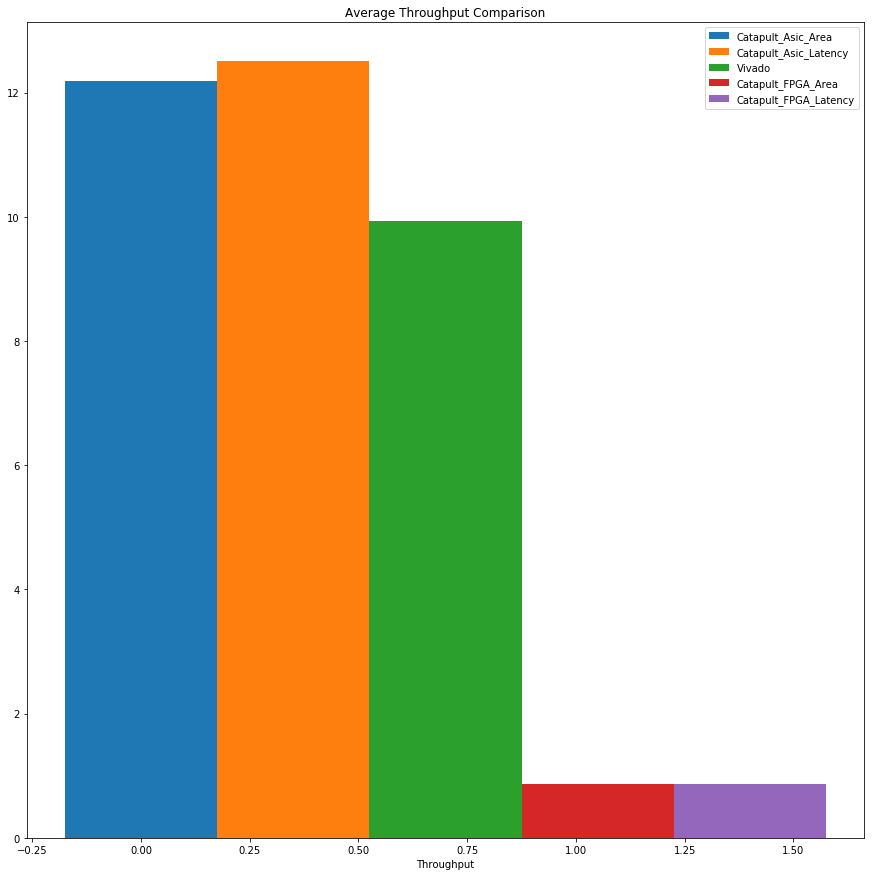

In [25]:
fig, ax = plt.subplots(figsize=(15,15))

N=1
caadfx_val=((1/caadfx['obj1']).mean())
caldfx_val=((1/caldfx['obj1']).mean())
vdfx_val=((1/vdfx['obj1']).mean())
cfadfx_val=((1/cfadfx['obj1']).mean())
cfldfx_val=((1/cfldfx['obj1']).mean())



ind = np.arange(N)
width = 0.35 
p1=ax.bar(ind,caadfx_val,width)
p2=ax.bar(ind+width,caldfx_val,width)
p3=ax.bar(ind+2*width,vdfx_val,width)
p4=ax.bar(ind+3*width,cfadfx_val,width)
p5=ax.bar(ind+4*width,cfldfx_val,width)
ax.set_title('Average Throughput Comparison')
ax.set_xlabel('Throughput')

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Catapult_Asic_Area', 'Catapult_Asic_Latency','Vivado','Catapult_FPGA_Area','Catapult_FPGA_Latency'))

ax.autoscale_view()
plt.show()

Text(0.5, 1.0, 'FF Distribution')

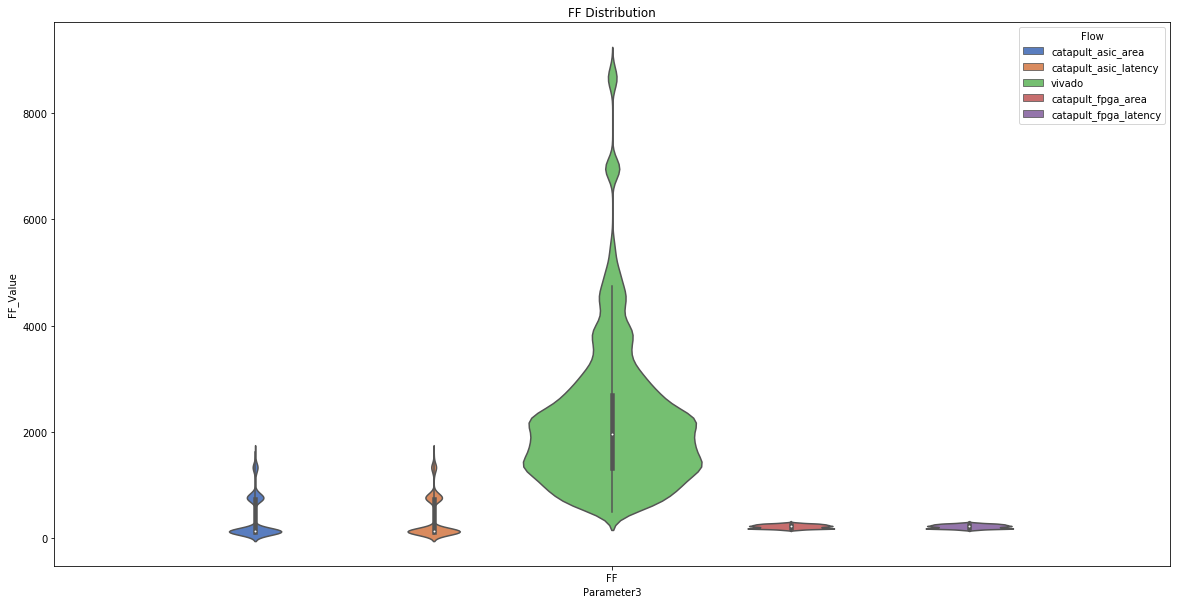

In [26]:
plt.figure(figsize=(20,10))
ax=sns.violinplot(x="Parameter3",y="FF_Value",data=violin,hue="Flow",palette="muted",scale="count")
plt.title("FF Distribution")

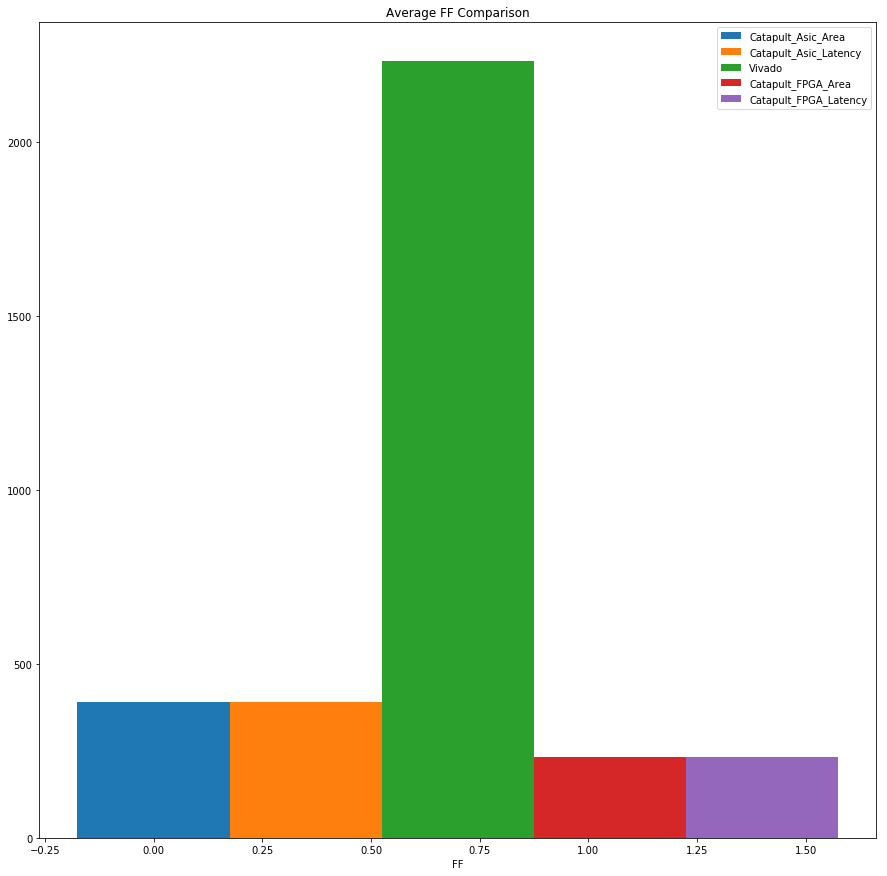

In [27]:


fig, ax = plt.subplots(figsize=(15,15))

N=1
caadfx_val=((caadfx['FF']).mean())
caldfx_val=((caldfx['FF']).mean())
vdfx_val=((vdfx['ff']).mean())
cfadfx_val=((cfadfx['ff']).mean())
cfldfx_val=((cfldfx['ff']).mean())



ind = np.arange(N)
width = 0.35 
p1=ax.bar(ind,caadfx_val,width)
p2=ax.bar(ind+width,caldfx_val,width)
p3=ax.bar(ind+2*width,vdfx_val,width)
p4=ax.bar(ind+3*width,cfadfx_val,width)
p5=ax.bar(ind+4*width,cfldfx_val,width)
ax.set_title('Average FF Comparison')
ax.set_xlabel('FF')

ax.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('Catapult_Asic_Area', 'Catapult_Asic_Latency','Vivado','Catapult_FPGA_Area','Catapult_FPGA_Latency'))

ax.autoscale_view()
plt.show()

